In [1]:
import torch
x = torch.arange(4.0)
x.requires_grad_(True)
x.grad

In [2]:
y = 2*torch.dot(x, x)
y.backward(retain_graph=True)
x.grad, x.grad == 4*x

(tensor([ 0.,  4.,  8., 12.]), tensor([True, True, True, True]))

In [3]:
# 2.3.6 T2
# 如果忘记清空x的gradient直接再一次调用无retain_graph=True的backward的话，会有RuntimeError
# 但是如果调用retain_graph=True的backward，需要记得清空x的gradient
try:
    y.backward(retain_graph=True)
    print(x.grad)
except RuntimeError as e:
    print("RuntimeError: ", e)
# after debug
x.grad.zero_()
y.backward()
x.grad, x.grad == 4*x

tensor([ 0.,  8., 16., 24.])


(tensor([ 0.,  4.,  8., 12.]), tensor([True, True, True, True]))

In [4]:
# 2.3.6 T3
def f(a):
    b = a*2
    while b.norm() < 1000:
        b = b*2
    if b.sum() > 0:
        c = b
    else:
        c = 100*b
    return c

arr = torch.tensor([1.0, 2.0, -1.0], requires_grad=True)
d = f(arr)
d.sum().backward()  # 如果函数传入向量，返回向量，那么需要用sum求和再求梯度
arr.grad, arr.grad == d/arr

(tensor([512., 512., 512.]), tensor([True, True, True]))

In [7]:
def g(x):
    return torch.abs(x)

scalar = torch.tensor(5., requires_grad=True)
d1 = g(scalar)
d1.backward()
print(scalar.grad)
vec = torch.tensor([-3., 4.], requires_grad=True)
d2 = g(vec)
d2.sum().backward()
print(vec.grad)

tensor(1.)
tensor([-1.,  1.])


In [8]:
%matplotlib inline
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline


def use_svg_display():
    """使用svg格式在Jupyter中显示绘图

    Defined in :numref:`sec_calculus`"""
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    """设置matplotlib的图表大小

    Defined in :numref:`sec_calculus`"""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴

    Defined in :numref:`sec_calculus`"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点

    Defined in :numref:`sec_calculus`"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    # 以下代码主要是考虑有x，y的时候实现多线画图
    # 无x的时候，默认x轴多线画图。
    #多线画图，就是要将输入转换为List[List[x]]类型。所以进行了若干分类讨论。
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

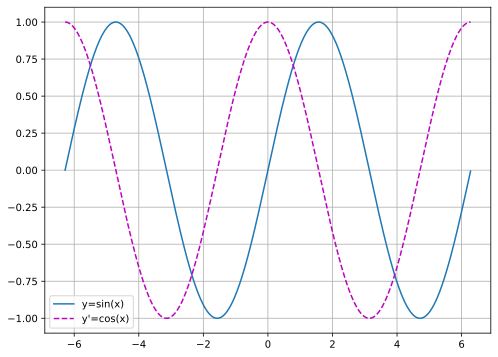

In [11]:
# 2.3.6 T3
x = torch.arange(-2*torch.pi, 2*torch.pi, 0.01, requires_grad=True)
y = torch.sin(x)
y.sum().backward()
y1 = x.grad
plot(x.detach().numpy(), [y.detach().numpy(), y1.detach().numpy()], figsize=(8, 6), legend=['y=sin(x)', 'y\'=cos(x)'])
